In [1]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import math


In [2]:
numSeries = 500 # training & testing & sequently predicting
numPredict = 100 # complete prediction
TRAIN_SIZE = 100
EFFECTIVE_COEFFICIENT = 0.25
EFFECTIVE_LOC = int(TRAIN_SIZE / EFFECTIVE_COEFFICIENT)
tmax = 2.0
h = 0.001
lentmax = int(tmax / h)

%store numSeries
%store numPredict
%store TRAIN_SIZE
%store EFFECTIVE_COEFFICIENT
%store EFFECTIVE_LOC
%store tmax
%store h
%store lentmax


Stored 'numSeries' (int)
Stored 'numPredict' (int)
Stored 'TRAIN_SIZE' (int)
Stored 'EFFECTIVE_COEFFICIENT' (float)
Stored 'EFFECTIVE_LOC' (int)
Stored 'tmax' (float)
Stored 'h' (float)
Stored 'lentmax' (int)


In [3]:
def semicircular_error(r, t):
    e = r - t
    if e >= 90:
        e = e - 180
    elif e < -90:
        e = e + 180
    return e

def atan_positive(x, y):
    if (x > 0) & (y > 0):
        theta = math.atan(y / x)
    elif (x == 0) & (y > 0):
        theta = math.pi / 2
    elif (x < 0):
        theta = math.pi + math.atan(y / x)
    elif (x == 0) & (y < 0):
        theta = 3 * math.pi / 2
    elif (x > 0) & (y <= 0):
        theta = 2 * math.pi + math.atan(y / x)
    return theta

def brwnm2(mu1, mu2, a, sigma, h, lentmax):
    locRT = 0
    theta_T = 999
    x = mu1 * h + sigma * numpy.random.randn(lentmax) * math.sqrt(h)
    y = mu2 * h + sigma * numpy.random.randn(lentmax) * math.sqrt(h)
    a_r = a - math.sqrt(h) * sigma / 2.0
    x_start = 0.0
    y_start = 0.0
    w = [x_start]
    z = [y_start] 
    flag = 0
    for k in numpy.arange(1, lentmax):
        w.append(w[k - 1] + x[k])
        z.append(z[k - 1] + y[k])
        if (flag == 0) & (w[k] ** 2 + z[k] ** 2 >= a_r ** 2):
            locRT = k
            theta_T = atan_positive(w[k], z[k]) / 2.0
            flag = 1
    return (w, z, theta_T, locRT)


In [4]:
norm, a, sigma = [], [], []
Target, Response, Error, RTloc = [], [], [], []
Dat = []

i = 0
while i < (numSeries + numPredict):
    '''
    norm0 = numpy.random.uniform(0.1, 10)
    a0 = numpy.random.uniform(0.1, 10)
    sigma0 = numpy.random.uniform(0.1, 10)
    RESP = numpy.random.randint(0, 180)
    '''
    norm0 = 1.0
    a0 = 1.0
    sigma0 = 1.0
    RESP = 60
    if RESP == 0:
        RESP = 180;
    mu1 = norm0 * math.cos(2 * RESP * math.pi / 180)
    mu2 = norm0 * math.sin(2 * RESP * math.pi / 180)
    (L_x, L_y, theta, t_loc) = brwnm2(mu1, mu2, a0, sigma0, h, lentmax)
    if t_loc >= EFFECTIVE_LOC:
        norm.append(norm0)
        a.append(a0)
        sigma.append(sigma0)
        Target.append(RESP)
        Response.append(theta / math.pi * 180)
        Error.append(semicircular_error(theta / math.pi * 180, RESP))
        RTloc.append(t_loc)
        temp = []
        for j in numpy.arange(lentmax):
            temp.append([L_x[j], L_y[j]])
        Dat.append(temp)
        i = i + 1


In [5]:
%store norm
%store a
%store sigma
%store Target
%store Response
%store Error
%store RTloc
%store Dat

print "Finish!"


Stored 'norm' (list)
Stored 'a' (list)
Stored 'sigma' (list)
Stored 'Target' (list)
Stored 'Response' (list)
Stored 'Error' (list)
Stored 'RTloc' (list)
Stored 'Dat' (list)
Finish!


/Users/chronowanderer/anaconda3/envs/tensorflow/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


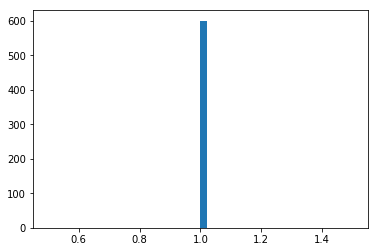

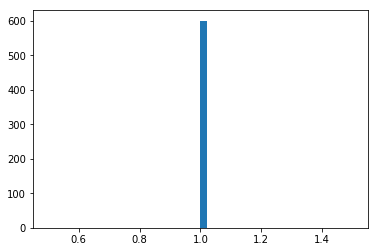

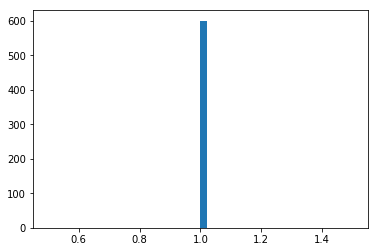

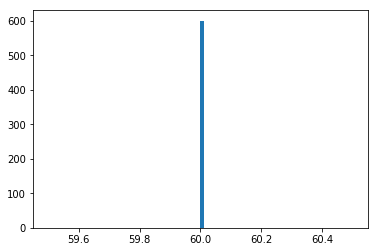

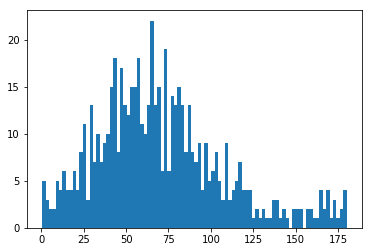

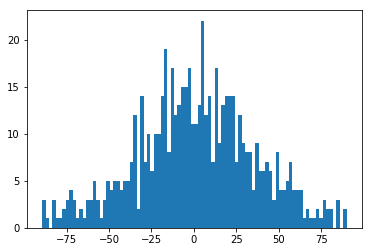

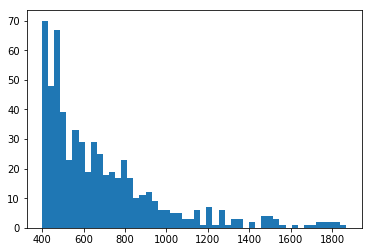

In [6]:
plt.hist(norm, 50, normed=False)
plt.show()
plt.hist(a, 50, normed=False)
plt.show()
plt.hist(sigma, 50, normed=False)
plt.show()
plt.hist(Target, 90, normed=False)
plt.show()
plt.hist(Response, 90, normed=False)
plt.show()
plt.hist(Error, 90, normed=False)
plt.show()
plt.hist(RTloc, 50, normed=False)
plt.show()
